# Chapter 9: Classification and Regression Trees

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
# from pandas import Timestamp

## Figure 9.7

In [2]:
# 데이타프레임 생성
Delay_df = dmba.load_data('FlightDelays.csv')

In [3]:
# 불필요한 열(column)삭제
Delay_df = Delay_df.drop(['DAY_OF_MONTH','DEP_TIME'], axis=1)

In [4]:
# 데이타프레임 다시보기
Delay_df.head()

,CRS_DEP_TIME,CARRIER,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,TAIL_NUM,Flight Status
0,1455,OH,JFK,184,01/01/2004,5935,BWI,0,4,N940CA,ontime
1,1640,DH,JFK,213,01/01/2004,6155,DCA,0,4,N405FJ,ontime
2,1245,DH,LGA,229,01/01/2004,7208,IAD,0,4,N695BR,ontime
3,1715,DH,LGA,229,01/01/2004,7215,IAD,0,4,N662BR,ontime
4,1039,DH,LGA,229,01/01/2004,7792,IAD,0,4,N698BR,ontime


In [5]:
# 범주형으로 변환 생략
Delay_df = pd.get_dummies(Delay_df, columns=['FL_NUM','TAIL_NUM'])

In [6]:
Delay_df= pd.get_dummies(Delay_df, columns=['CARRIER', 'DEST', 'ORIGIN']) 
# 열값을 원-핫인코딩 하여 새로운 데이터프레임 생성하면서 이진형태로 변환

In [7]:
# DATE를 날자형식으로 변환
Delay_df['FL_DATE'] = pd.to_datetime(Delay_df['FL_DATE'])

In [8]:
# 열 삭제
# Delay_df_encoded = Delay_df_encoded.drop(['FL_DATE','TAIL_NUM'], axis=1)
# Delay_df= Delay_df.drop(['TAIL_NUM'], axis=1)

In [9]:
# 'DAY_WEEK'가 숫자로 표현되어 있으나 범주형으로 변형, 특정일자보다 특정요일에 의한 연착등이 나타날 수 있음
Delay_df['DAY_WEEK'] = Delay_df['DAY_WEEK'].astype('category')

In [10]:
# 출발시간 8구간으로 나누기
Delay_df['Bins_CRS'] = pd.cut(Delay_df['CRS_DEP_TIME'], bins=8)

# 구간의 중앙값을 실수로 변환
Delay_df['Bins_CRS'] = Delay_df['Bins_CRS'].apply(lambda x: x.mid)

In [11]:
Delay_df.head()

,CRS_DEP_TIME,DISTANCE,FL_DATE,Weather,DAY_WEEK,Flight Status,FL_NUM_746,FL_NUM_806,FL_NUM_808,FL_NUM_810,...,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_EWR,DEST_JFK,DEST_LGA,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,Bins_CRS
0,1455,184,2004-01-01,0,4,ontime,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1460.625
1,1640,213,2004-01-01,0,4,ontime,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1651.875
2,1245,229,2004-01-01,0,4,ontime,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1269.375
3,1715,229,2004-01-01,0,4,ontime,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1651.875
4,1039,229,2004-01-01,0,4,ontime,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1078.125


In [12]:
# Delay_df_encoded.head()

In [13]:
# 삭제
Delay_df= Delay_df.drop(['CRS_DEP_TIME'], axis=1)

In [14]:
# 분류기 생성(시드값=0, 깊이=8, 최소불순도 감소=0.01)
classTree = DecisionTreeClassifier(random_state=0, max_depth=8, min_impurity_decrease=0.01) 

In [15]:
# 학습(독립변수를 Flight Status제외한 모든 열, 종속변수를 Flights Status로)
classTree.fit(Delay_df.drop(columns=['Flight Status','FL_DATE']), Delay_df['Flight Status']) 

DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0.01, random_state=0)

Classes: delayed, ontime


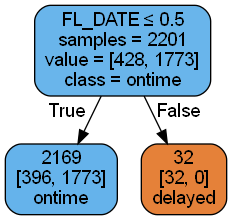

In [16]:
# 결정트리 출력
print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=Delay_df.columns[:670], class_names=classTree.classes_)

The order of the `values` vector in the boxes is the same as `classTree.classes_`.

## Figure 9.10

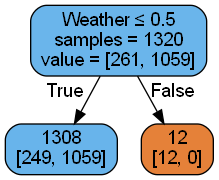

In [17]:
X = Delay_df.drop(columns=['Flight Status','FL_DATE'])
y = Delay_df['Flight Status']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# fullClassTree = DecisionTreeClassifier()
fullClassTree = DecisionTreeClassifier(random_state=0, max_depth=8, min_impurity_decrease=0.01)
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [18]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8114)

       Prediction
Actual    0    1
     0   12  249
     1    0 1059
Confusion Matrix (Accuracy 0.8331)

       Prediction
Actual   0   1
     0  20 147
     1   0 714


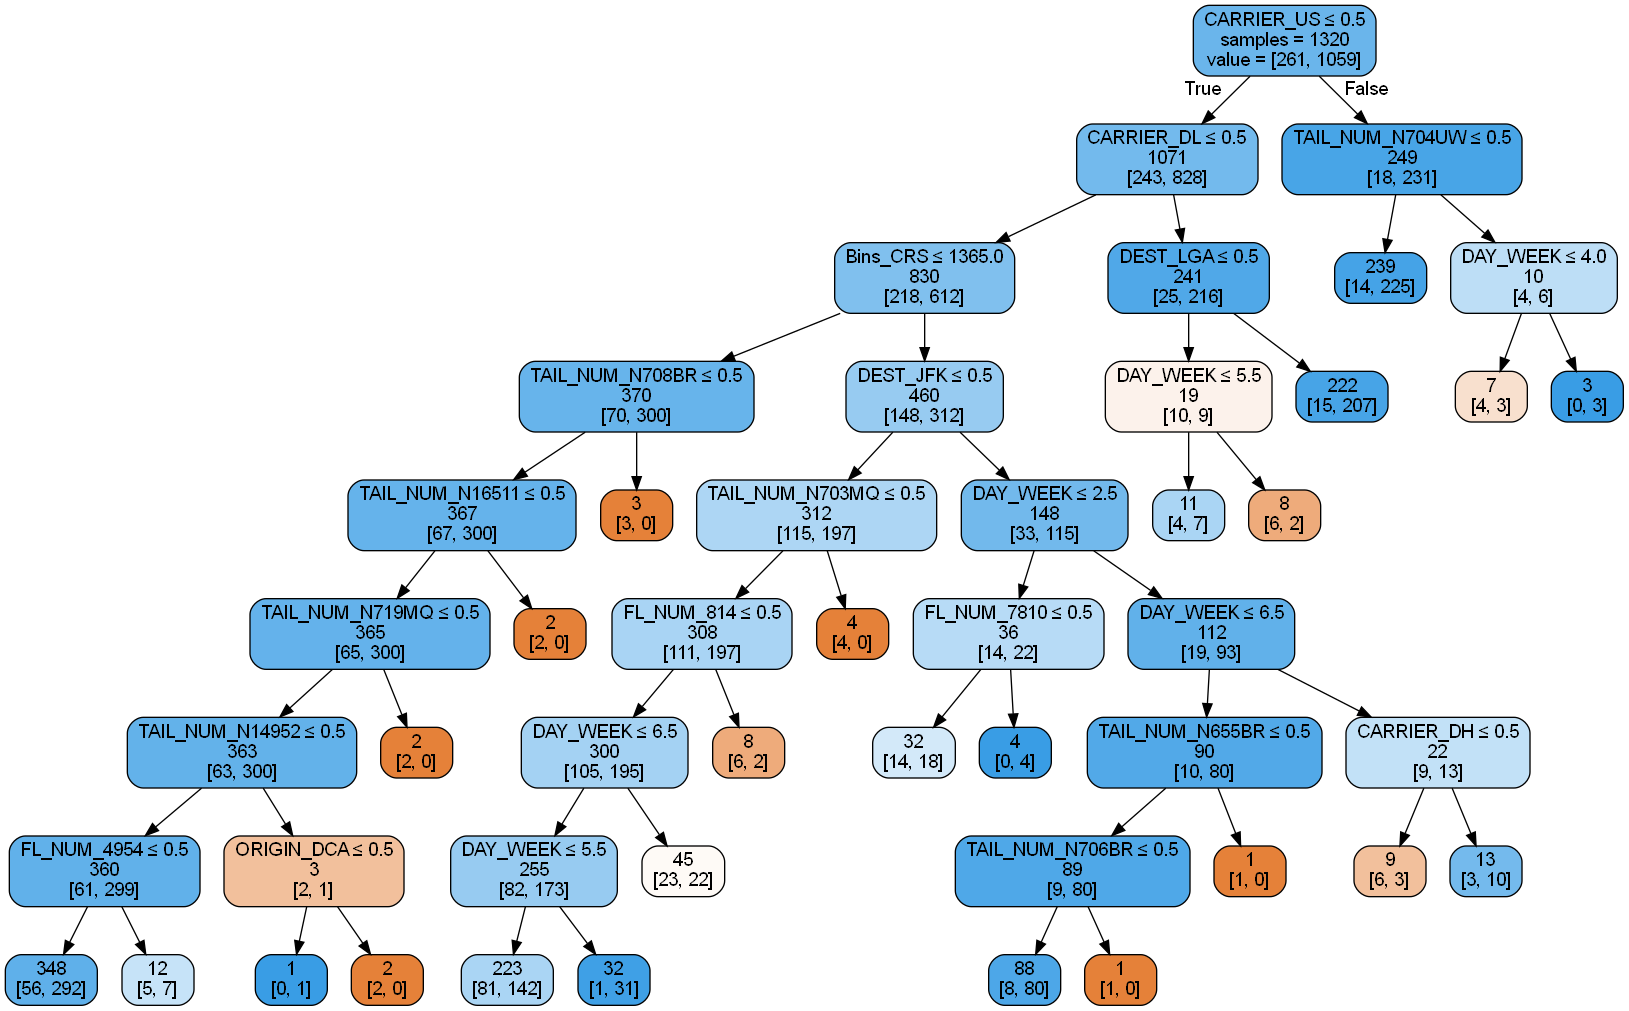

In [19]:
X = Delay_df.drop(columns=['Flight Status','FL_DATE','Weather'])
y = Delay_df['Flight Status']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# fullClassTree = DecisionTreeClassifier()
fullClassTree = DecisionTreeClassifier(random_state=0, max_depth=8, min_impurity_decrease=0.001)
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [20]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8235)

       Prediction
Actual    0    1
     0   60  201
     1   32 1027
Confusion Matrix (Accuracy 0.8002)

       Prediction
Actual   0   1
     0  17 150
     1  26 688


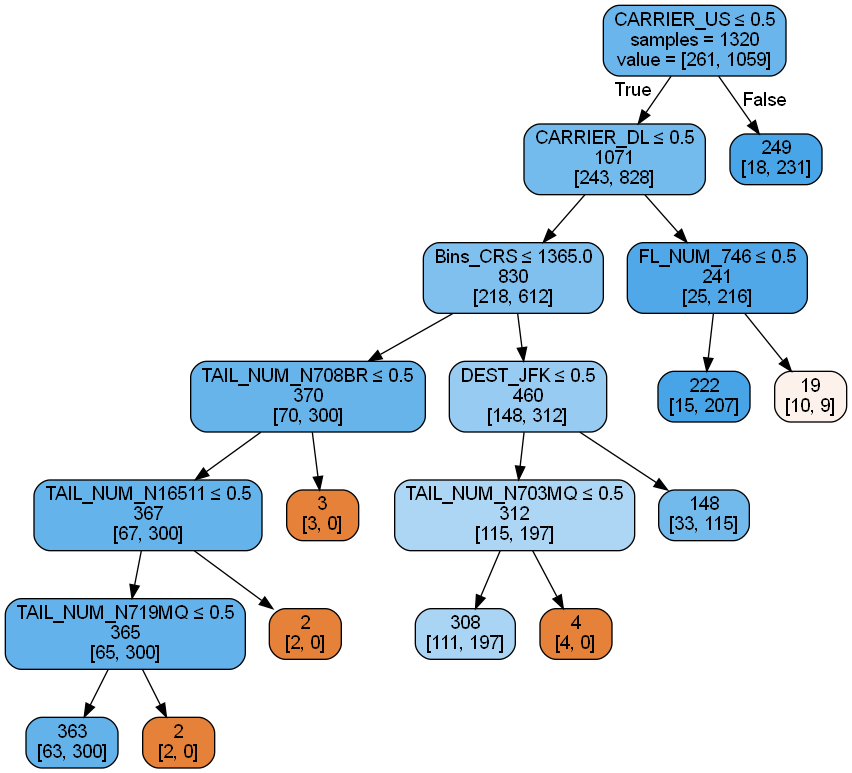

In [21]:
X = Delay_df.drop(columns=['Flight Status','FL_DATE','Weather'])
y = Delay_df['Flight Status']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# fullClassTree = DecisionTreeClassifier()
fullClassTree = DecisionTreeClassifier(random_state=0, max_depth=8, min_impurity_decrease=0.002)
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [22]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8114)

       Prediction
Actual    0    1
     0   21  240
     1    9 1050
Confusion Matrix (Accuracy 0.8036)

       Prediction
Actual   0   1
     0   6 161
     1  12 702


In [23]:
Delay_df.head()

,DISTANCE,FL_DATE,Weather,DAY_WEEK,Flight Status,FL_NUM_746,FL_NUM_806,FL_NUM_808,FL_NUM_810,FL_NUM_814,...,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_EWR,DEST_JFK,DEST_LGA,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,Bins_CRS
0,184,2004-01-01,0,4,ontime,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1460.625
1,213,2004-01-01,0,4,ontime,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1651.875
2,229,2004-01-01,0,4,ontime,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1269.375
3,229,2004-01-01,0,4,ontime,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1651.875
4,229,2004-01-01,0,4,ontime,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1078.125


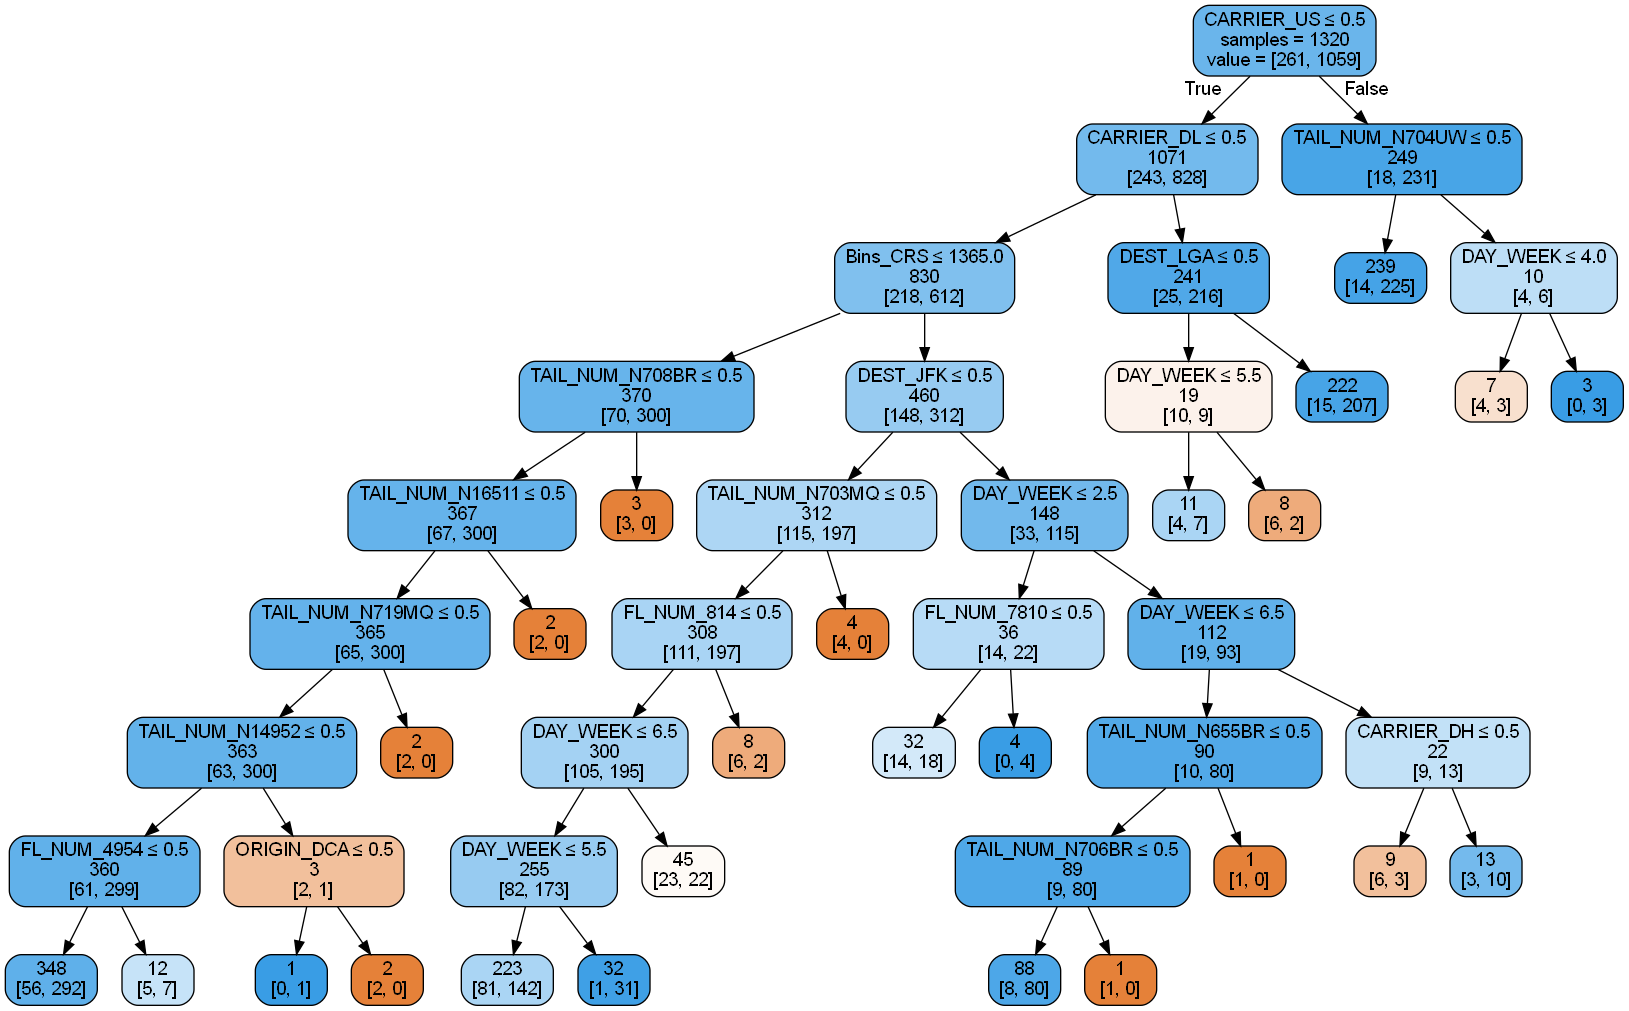

In [24]:
X = Delay_df.drop(columns=['Flight Status','FL_DATE','Weather'])
y = Delay_df['Flight Status']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=1)

# fullClassTree = DecisionTreeClassifier()
fullClassTree = DecisionTreeClassifier(random_state=0, max_depth=8, min_impurity_decrease=0.001)
fullClassTree.fit(X_train, y_train)

# 가지치기를 위한 최적의 alpha 값 탐색
path = fullClassTree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# 검증 데이터에서의 성능 평가
train_scores = [clf.score(X_train, y_train) for clf in clfs]
val_scores = [clf.score(X_val, y_val) for clf in clfs]

# 최적의 alpha 값 선택
best_alpha = ccp_alphas[np.argmax(val_scores)]

# 최적 alpha 값으로 가지치기 수행
pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

plotDecisionTree(fullClassTree, feature_names=X_train.columns)

In [25]:
classificationSummary(y_train, fullClassTree.predict(X_train))
classificationSummary(y_val, fullClassTree.predict(X_val))

Confusion Matrix (Accuracy 0.8235)

       Prediction
Actual    0    1
     0   60  201
     1   32 1027
Confusion Matrix (Accuracy 0.8002)

       Prediction
Actual   0   1
     0  17 150
     1  26 688


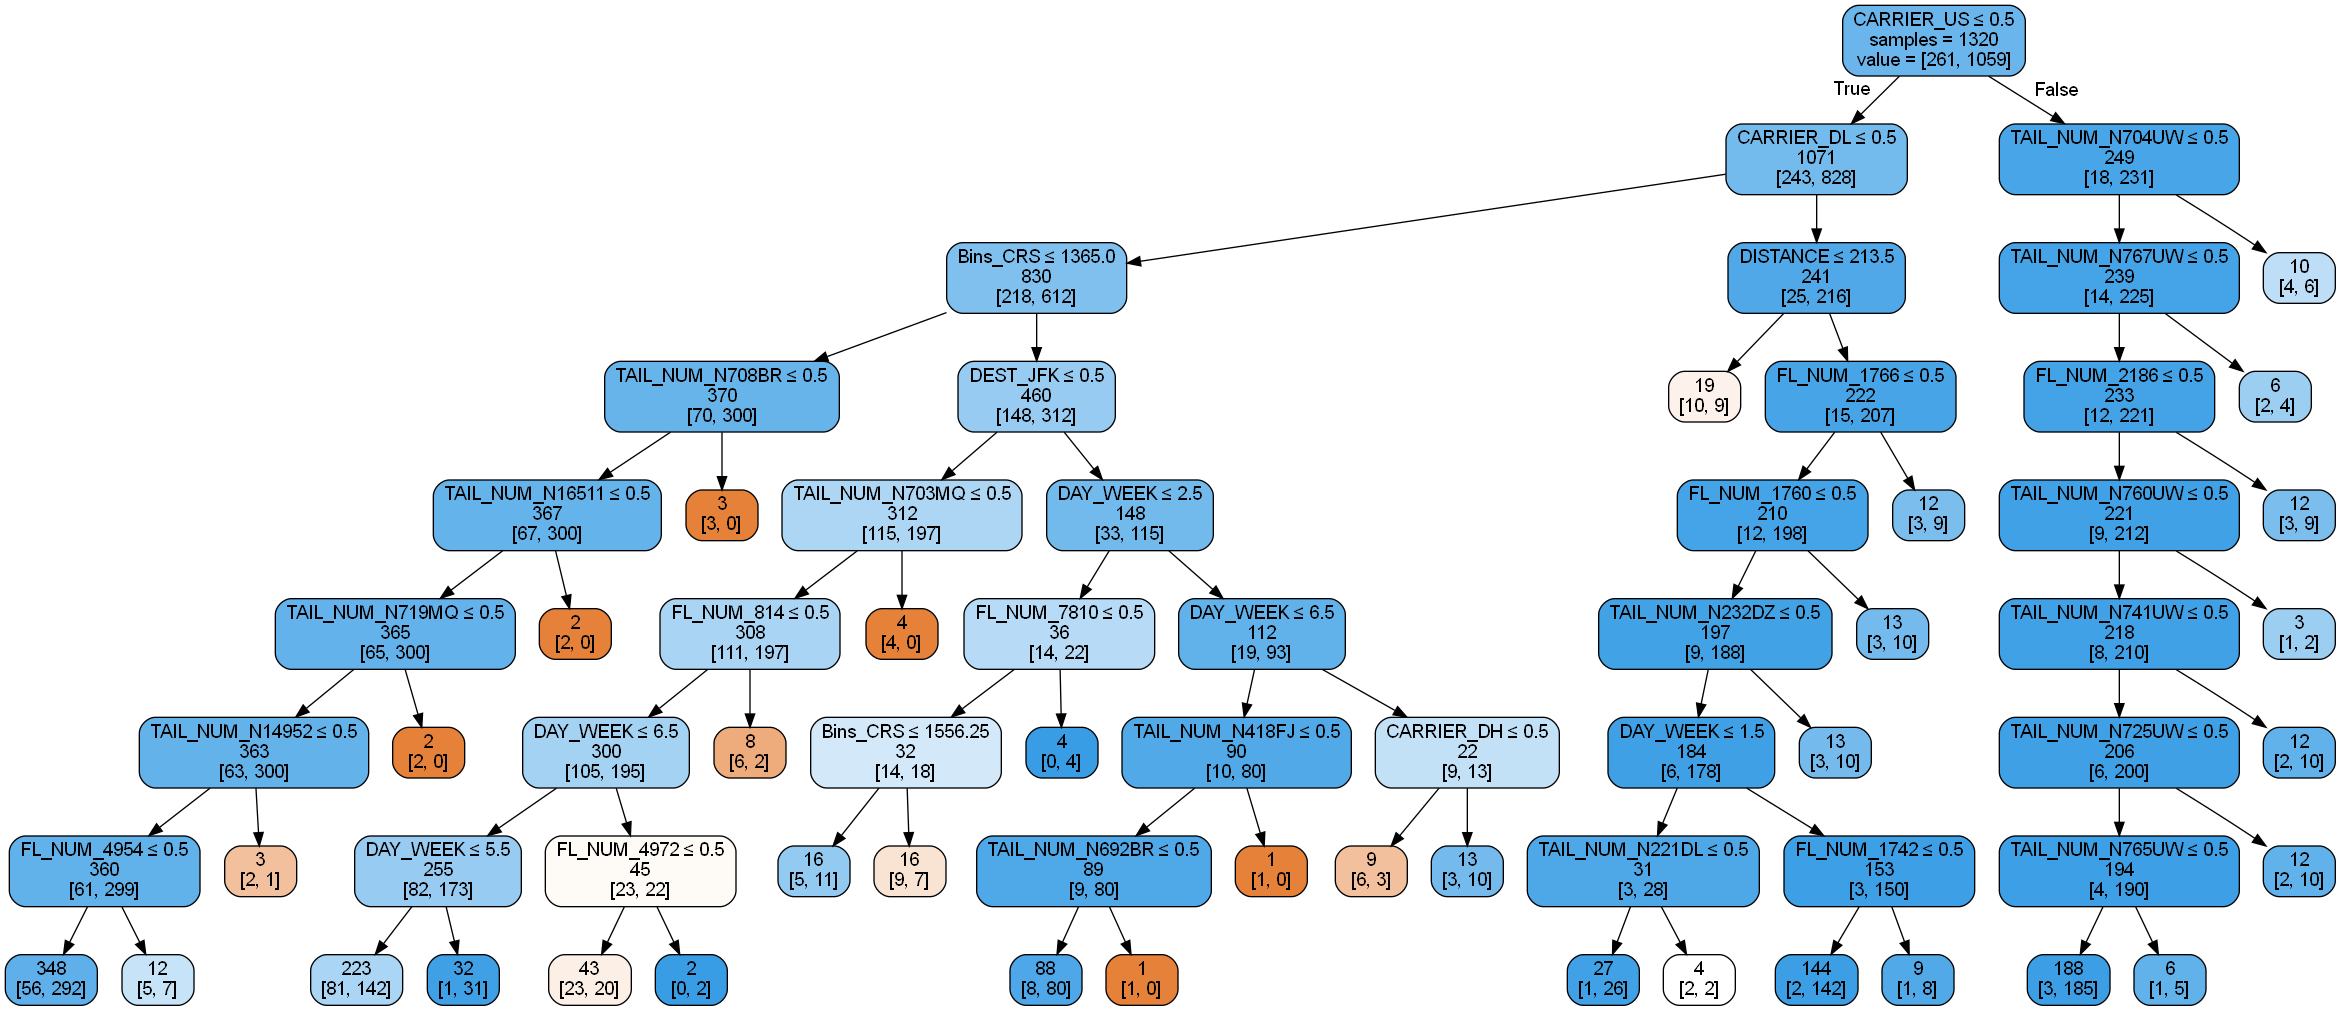

In [26]:
smallClassTree = DecisionTreeClassifier(random_state=0,max_depth=8, min_samples_split=20, min_impurity_decrease=0.00)
smallClassTree.fit(train_X, train_y)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [27]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8235)

       Prediction
Actual    0    1
     0   60  201
     1   32 1027
Confusion Matrix (Accuracy 0.8002)

       Prediction
Actual   0   1
     0  17 150
     1  26 688
